# Regression on Graduate Admission Prediction dataset

In [1]:
import tensorflow as tf
import numpy as np
import pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.regularizers import l2
import tensorflow.keras.datasets.mnist as mnist


import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

## Set parameters

In [2]:
lr = 0.001
no_epochs = 100
batch_size = 8
beta = 0.001

no_neurons = 10

seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)

## Read data

In [3]:
# read in data from csv file
df = pd.read_csv('admission_predict.csv')
df=df.values

In [4]:
# data
# generate training data from csv file

# inputs are the second colomn to the last second column
X = df[:,1:8]
# normalizing every input
mean_arr = np.mean(X, axis = 0)
std_arr = np.std(X, axis = 0)
for i in range(400):
    for j in range(7):
        X[i,j] = (X[i,j] - mean_arr[j])/std_arr[j]
        
# target is the last column
Y = df[:,8]
Y = Y.reshape(400,1)
# split training and testing sets (70/30)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42) 

## Implement training function

In [5]:
def train(no_inputs, x_train, y_train, x_test, y_test):
    # min and max value for weight initialization
    w_min_relu = -np.sqrt(6)/np.sqrt(no_inputs+no_neurons)
    w_max_relu = np.sqrt(6)/np.sqrt(no_inputs+no_neurons)
    w_min_linear = -np.sqrt(6)/np.sqrt(no_neurons+1)
    w_max_linear = np.sqrt(6)/np.sqrt(no_neurons+1)
    
    err = np.zeros((1, no_epochs))
    model = Sequential([Dense(no_neurons, activation='relu', 
                          kernel_initializer=RandomUniform(w_min_relu, w_max_relu), 
                          kernel_regularizer=l2(beta)),
                    Dense(1, activation = 'linear',
                          kernel_initializer=RandomUniform(w_min_linear, w_max_linear),
                          kernel_regularizer=l2(beta))])
    
    model.compile(optimizer='sgd', 
              loss='mean_squared_error',
              metrics=['mse'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=no_epochs,
                    verbose=0,
                    use_multiprocessing=True,
                    validation_data=(x_test, y_test))
    
    err = history.history['val_mse']
            
    return err

## Train with 7, 6, and 5 inputs

In [6]:
err_7 = train(7, x_train, y_train, x_test, y_test)

In [7]:
# eliminate 1 input by comparing the performance
err_6_ex1 = train(6, x_train[:,1:7], y_train, x_test[:,1:7], y_test)
err_6_ex2 = train(6, np.append(x_train[:,0].reshape(280,1), x_train[:,2:7], axis=1), y_train, np.append(x_test[:,0].reshape(120,1), x_test[:,2:7], axis=1), y_test)
err_6_ex3 = train(6, np.append(x_train[:,0:2], x_train[:,3:7], axis=1), y_train, np.append(x_test[:,0:2], x_test[:,3:7], axis=1), y_test)
err_6_ex4 = train(6, np.append(x_train[:,0:3], x_train[:,4:7], axis=1), y_train, np.append(x_test[:,0:3], x_test[:,4:7], axis=1), y_test)
err_6_ex5 = train(6, np.append(x_train[:,0:4], x_train[:,5:7], axis=1), y_train, np.append(x_test[:,0:4], x_test[:,5:7], axis=1), y_test)
err_6_ex6 = train(6, np.append(x_train[:,0:5], x_train[:,6].reshape(280,1), axis=1), y_train, np.append(x_test[:,0:5], x_test[:,6].reshape(120,1), axis=1), y_test)
err_6_ex7 = train(6, x_train[:,0:6], y_train, x_test[:,0:6], y_test)

print('mean squared error without the 1st input: %g' %err_6_ex1[no_epochs - 1])
print('mean squared error without the 2nd input: %g' %err_6_ex2[no_epochs - 1])
print('mean squared error without the 3rd input: %g' %err_6_ex3[no_epochs - 1])
print('mean squared error without the 4th input: %g' %err_6_ex4[no_epochs - 1])
print('mean squared error without the 5th input: %g' %err_6_ex5[no_epochs - 1])
print('mean squared error without the 6th input: %g' %err_6_ex6[no_epochs - 1])
print('mean squared error without the 7th input: %g' %err_6_ex7[no_epochs - 1])




mean squared error without the 1st input: 0.00709777
mean squared error without the 2nd input: 0.00591319
mean squared error without the 3rd input: 0.0058178
mean squared error without the 4th input: 0.00641186
mean squared error without the 5th input: 0.00515609
mean squared error without the 6th input: 0.00671669
mean squared error without the 7th input: 0.00652013


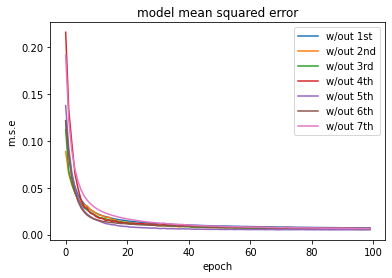

In [8]:
plt.plot(err_6_ex1)
plt.plot(err_6_ex2)
plt.plot(err_6_ex3)
plt.plot(err_6_ex4)
plt.plot(err_6_ex5)
plt.plot(err_6_ex6)
plt.plot(err_6_ex7)
plt.title('model mean squared error')
plt.ylabel('m.s.e')
plt.xlabel('epoch')
plt.legend(['w/out 1st', 'w/out 2nd', 'w/out 3rd', 'w/out 4th', 'w/out 5th', 'w/out 6th', 'w/out 7th'], loc='upper right')
plt.show()

In [9]:
# eleminate the 5th input
x_train = np.append(x_train[:,0:4], x_train[:,5:7], axis=1)
x_test = np.append(x_test[:,0:4], x_test[:,5:7], axis = 1)

# get the error after elimination
#err_6 = train(6, x_train, y_train, x_test, y_test)


# eliminate 1 more input by comparing the performance
err_5_ex1 = train(5, x_train[:,1:6], y_train, x_test[:,1:6], y_test)
err_5_ex2 = train(5, np.append(x_train[:,0].reshape(280,1), x_train[:,2:6], axis=1), y_train, np.append(x_test[:,0].reshape(120,1), x_test[:,2:6], axis=1), y_test)
err_5_ex3 = train(5, np.append(x_train[:,0:2], x_train[:,3:6], axis=1), y_train, np.append(x_test[:,0:2], x_test[:,3:6], axis=1), y_test)
err_5_ex4 = train(5, np.append(x_train[:,0:3], x_train[:,4:6], axis=1), y_train, np.append(x_test[:,0:3], x_test[:,4:6], axis=1), y_test)
err_5_ex5 = train(5, np.append(x_train[:,0:4], x_train[:,5].reshape(280,1), axis=1), y_train, np.append(x_test[:,0:4], x_test[:,5].reshape(120,1), axis=1), y_test)
err_5_ex6 = train(5, x_train[:,0:5], y_train, x_test[:,0:5], y_test)

print('mean squared error without the 1st input: %g' %err_5_ex1[no_epochs - 1])
print('mean squared error without the 2nd input: %g' %err_5_ex2[no_epochs - 1])
print('mean squared error without the 3rd input: %g' %err_5_ex3[no_epochs - 1])
print('mean squared error without the 4th input: %g' %err_5_ex4[no_epochs - 1])
print('mean squared error without the 5th input: %g' %err_5_ex5[no_epochs - 1])
print('mean squared error without the 6th input: %g' %err_5_ex6[no_epochs - 1])

mean squared error without the 1st input: 0.00567427
mean squared error without the 2nd input: 0.00703235
mean squared error without the 3rd input: 0.00544861
mean squared error without the 4th input: 0.00533754
mean squared error without the 5th input: 0.00713808
mean squared error without the 6th input: 0.005567


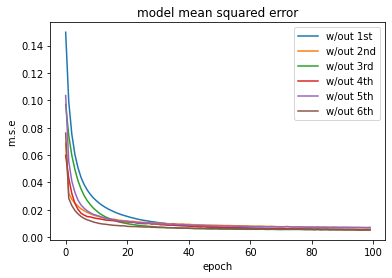

In [10]:
plt.plot(err_5_ex1)
plt.plot(err_5_ex2)
plt.plot(err_5_ex3)
plt.plot(err_5_ex4)
plt.plot(err_5_ex5)
plt.plot(err_5_ex6)
plt.title('model mean squared error')
plt.ylabel('m.s.e')
plt.xlabel('epoch')
plt.legend(['w/out 1st', 'w/out 2nd', 'w/out 3rd', 'w/out 4th', 'w/out 5th', 'w/out 6th'], loc='upper right')
plt.show()

## Compare performance

In [11]:
# eleminate the 3rd input
x_train = np.append(x_train[:,0:2], x_train[:,3:6], axis=1)
x_test = np.append(x_test[:,0:2], x_test[:,3:6], axis=1)

# get the error after elimination
#err_5 = train(5, x_train, y_train, x_test, y_test)


print('mean squared error with all inputs: %g' %err_7[no_epochs - 1])
print('mean squared error with 6 inputs: %g' %err_6_ex5[no_epochs - 1])
print('mean squared error with 5 inputs: %g' %err_5_ex3[no_epochs - 1])

mean squared error with all inputs: 0.00654147
mean squared error with 6 inputs: 0.00515609
mean squared error with 5 inputs: 0.00544861


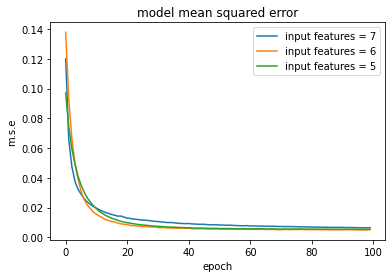

In [12]:
# summarize history for accuracy
plt.plot(err_7)
plt.plot(err_6_ex5)
plt.plot(err_5_ex3)
plt.title('model mean squared error')
plt.ylabel('m.s.e')
plt.xlabel('epoch')
plt.legend(['input features = 7', 'input features = 6', 'input features = 5'], loc='upper right')
plt.show()
